In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

encoding_dim = 32

# Define the input shape
input_img = Input(shape=(784,))

# Define the encoded layer
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Define the decoded layer
decoded = Dense(784, activation='sigmoid')(encoded)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# Define the encoder model
encoder = Model(input_img, encoded)

# Define the decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Load the MNIST dataset
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the dataset
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the dataset
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2764 - val_loss: 0.1919
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1712 - val_loss: 0.1538
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1442 - val_loss: 0.1337
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1286 - val_loss: 0.1213
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1183 - val_loss: 0.1131
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1113 - val_loss: 0.1072
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1063 - val_loss: 0.1032
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1027 - val_loss: 0.1000
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1000 - val_loss: 0.0977
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0980 - val_loss: 0.0961

In [ ]:
# Define the occluded image
original_image = x_test[21]
occluded_image = original_image.copy()
occlusion_size = 10
occlusion_value = 0.5
occluded_image[190:220+occlusion_size] = occlusion_value

# Visualize the occluded image
import matplotlib.pyplot as plt
#plt.imshow(occluded_image.reshape(28, 28))

# Predict the original image
encoded_image = encoder.predict(occluded_image.reshape(1, 784))
decoded_image = decoder.predict(encoded_image)

# Visualize the reconstructed image
#plt.imshow(encoded_image.reshape(28, 28))
#plt.imshow(decoded_image.reshape(28, 28))

1/1 [==============================] - 0s 19ms/step


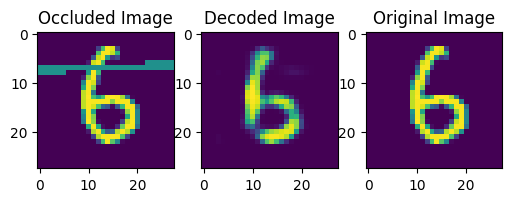

In [ ]:

plt.figure(figsize=(6, 4))
plt.subplot(131)
plt.imshow(occluded_image.reshape(28, 28))
plt.title('Occluded Image')
plt.subplot(132)
plt.imshow(decoded_image.reshape(28, 28))
plt.title('Decoded Image')
plt.subplot(133)
plt.imshow(original_image.reshape(28, 28))
plt.title('Original Image')

plt.show()